# $Scaling$

In [40]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler


import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w

In [2]:
df = w.wrangle_single_family_residential()

In [4]:
df.columns

Index(['bedroom', 'bathroom', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount', 'fips'],
      dtype='object')

In [6]:
df = w.remove_outliers(df,['squarefeet','taxamount','tax_value','bathroom','bedroom'])

In [7]:
train, validate, test = w.split_data(df)

In [9]:
train.isnull().sum()

bedroom       0
bathroom      0
squarefeet    0
tax_value     0
yearbuilt     0
taxamount     0
fips          0
dtype: int64

In [10]:
train.head()

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1754169,4.0,3.5,4044.0,1139088.0,1989.0,11545.48,6059.0
1221606,4.0,2.0,2378.0,418000.0,1948.0,5781.99,6037.0
1264841,3.0,2.0,1242.0,282308.0,1954.0,3602.52,6037.0
4661,3.0,1.0,1569.0,62828.0,1923.0,883.26,6037.0
1080763,3.0,1.0,1006.0,536000.0,1913.0,6520.20,6037.0


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom,1146287.0,3.260069,0.867203,1.00,3.000,3.00,4.000,6.0
bathroom,1146287.0,2.147012,0.817398,0.00,2.000,2.00,3.000,5.5
squarefeet,1146287.0,1756.303304,708.028175,1.00,1246.000,1594.00,2119.000,5057.0
tax_value,1146287.0,374963.054685,264586.835940,22.00,183509.000,316213.00,500000.000,1460504.0
yearbuilt,1146287.0,1960.392843,21.584448,1801.00,1949.000,1958.00,1974.000,2016.0
taxamount,1146287.0,4630.846192,3048.304862,20.24,2477.285,3974.58,6030.335,17607.6
fips,1146287.0,6048.401857,20.494672,6037.00,6037.000,6037.00,6059.000,6111.0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146287 entries, 1754169 to 1513164
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedroom     1146287 non-null  float64
 1   bathroom    1146287 non-null  float64
 2   squarefeet  1146287 non-null  float64
 3   tax_value   1146287 non-null  float64
 4   yearbuilt   1146287 non-null  float64
 5   taxamount   1146287 non-null  float64
 6   fips        1146287 non-null  float64
dtypes: float64(7)
memory usage: 70.0 MB


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [17]:
# must be df.copy otherwise df_scaled will also change df scale
train_scaled= train.copy()
train_scaled2= train.copy()
train_scaled3= train.copy()

In [18]:
train.columns

Index(['bedroom', 'bathroom', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount', 'fips'],
      dtype='object')

In [19]:
# columns to scale
columns_to_scale = ['bedroom', 'bathroom','squarefeet','yearbuilt','taxamount']

In [20]:
# make object to store scaler MinMax scaler
scaler1 = sklearn.preprocessing.MinMaxScaler()

#fit the scaler to columns
scaler1.fit(train_scaled[columns_to_scale])

train_scaled[columns_to_scale] = scaler1.transform(train_scaled[columns_to_scale])

In [21]:
train_scaled.head()

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1754169,0.6,0.636364,0.799644,1139088.0,0.874419,0.655314,6059.0
1221606,0.6,0.363636,0.470134,418000.0,0.683721,0.327607,6037.0
1264841,0.4,0.363636,0.245451,282308.0,0.711628,0.203685,6037.0
4661,0.4,0.181818,0.310127,62828.0,0.567442,0.049070,6037.0
1080763,0.4,0.181818,0.198774,536000.0,0.520930,0.369581,6037.0


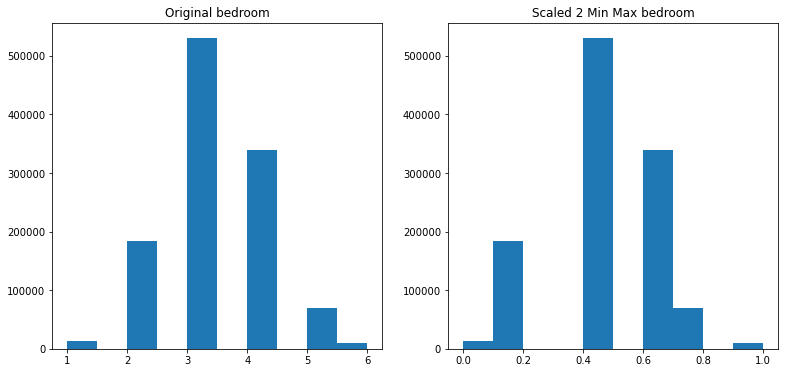

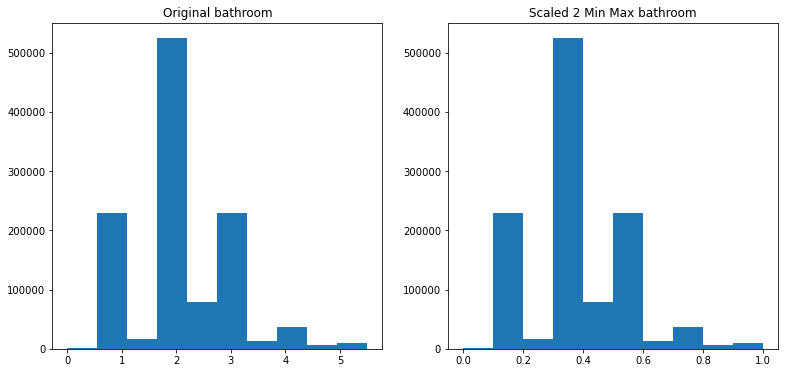

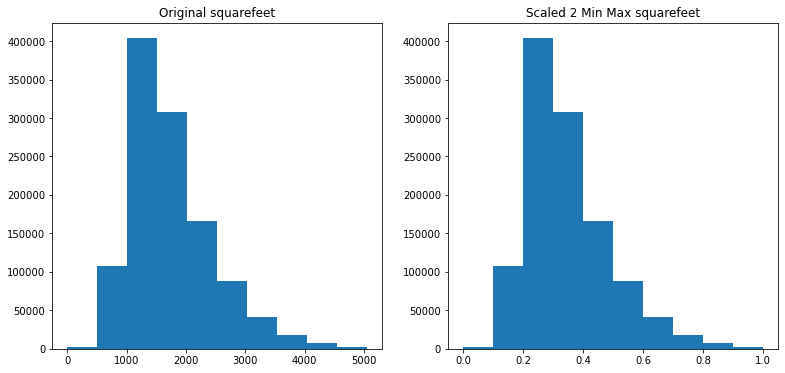

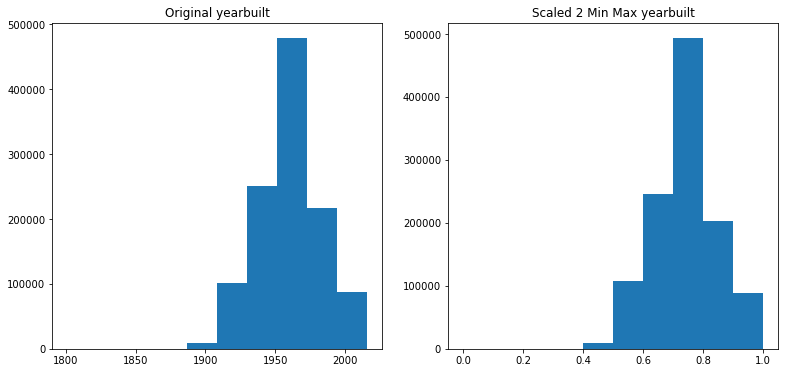

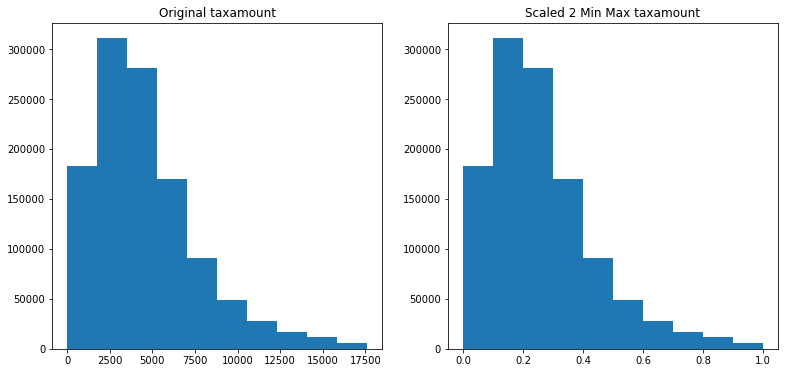

In [28]:
for i in columns_to_scale:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.title(f'Original {i}')
    plt.hist(data=train, x= i,bins=10)
  
    plt.subplot(122)
    plt.hist(data=train_scaled, x= i,bins=10)
    plt.title(f'Scaled 2 Min Max {i}');

In [71]:
# using StandardScaler, create object to store scaler
scaler2 = sklearn.preprocessing.StandardScaler()

# fir scaler into data
scaler2.fit(train_scaled2[columns_to_scale])

train_scaled2[columns_to_scale] = scaler2.fit_transform(train_scaled2[columns_to_scale])

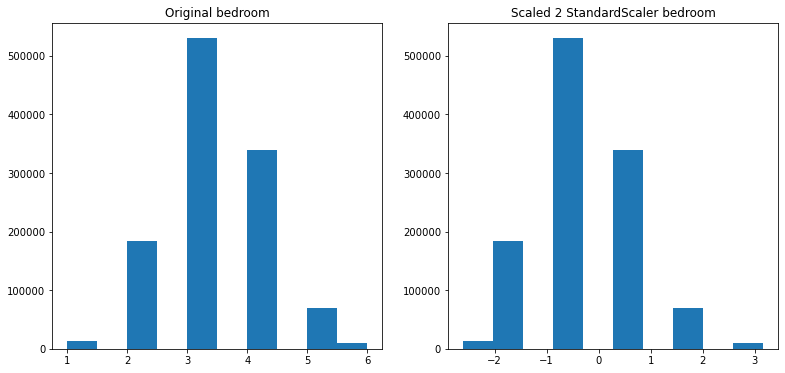

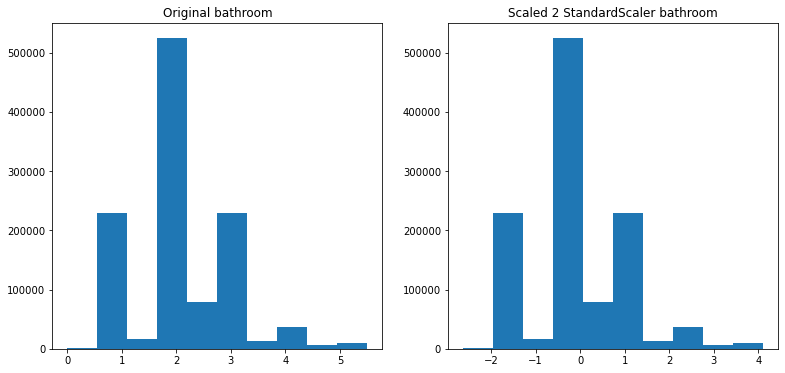

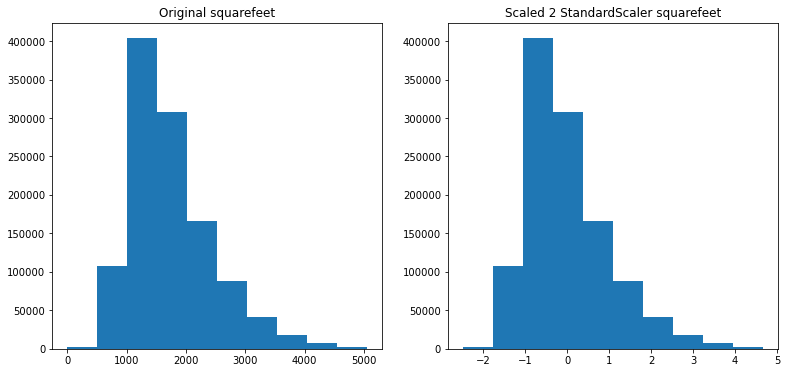

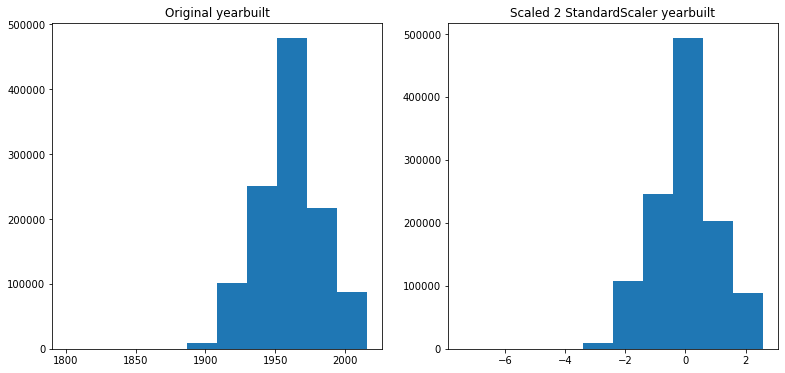

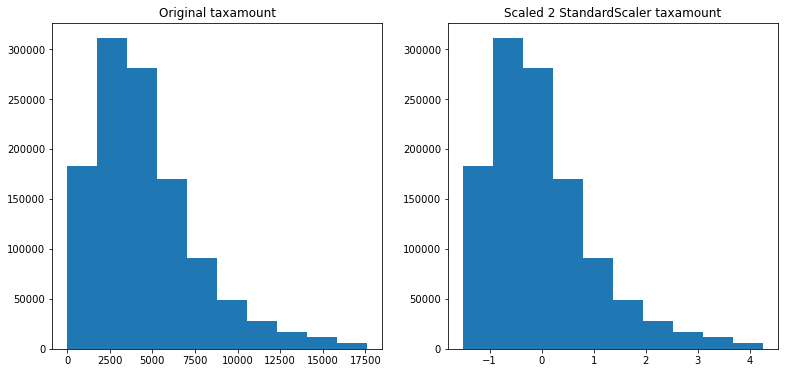

In [50]:
for i in columns_to_scale:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.title(f'Original {i}')
    plt.hist(data=train, x= i,bins=10)

    plt.subplot(122)
    plt.hist(data=train_scaled2, x= i,bins=10)
    plt.title(f'Scaled 2 StandardScaler {i}');

In [51]:
# Using Robust scaler, create object to store scaler
scaler3 = sklearn.preprocessing.RobustScaler()

# fit scaler
scaler3.fit(train_scaled3[columns_to_scale])

train_scaled3[columns_to_scale] = scaler3.fit_transform(train_scaled3[columns_to_scale])

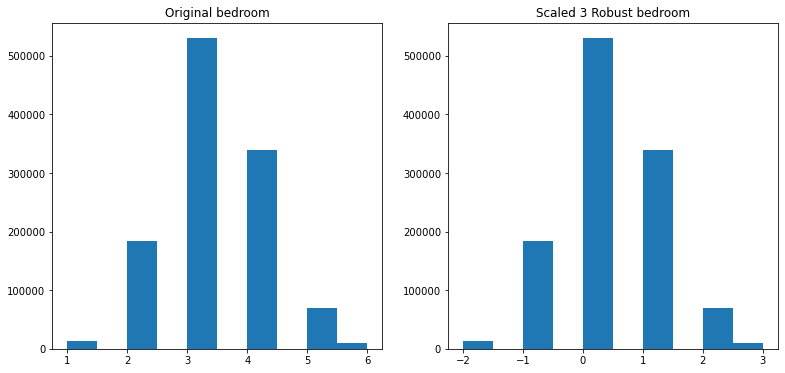

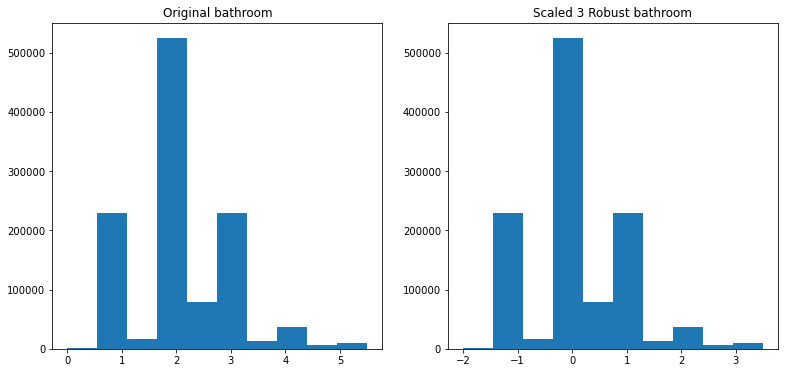

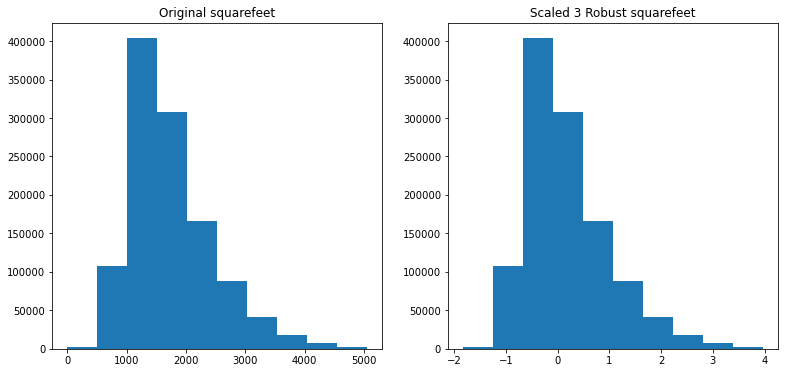

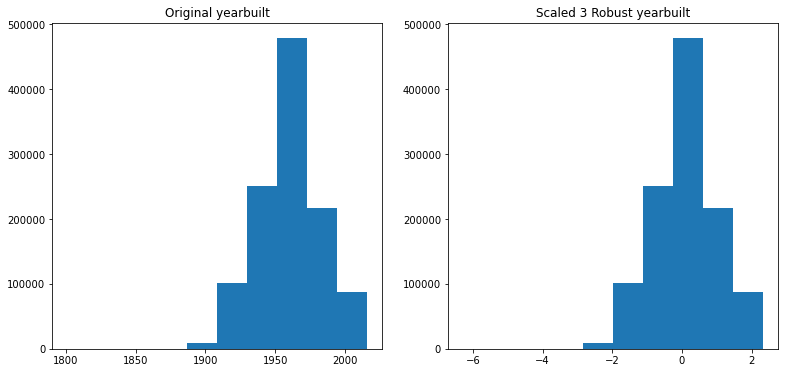

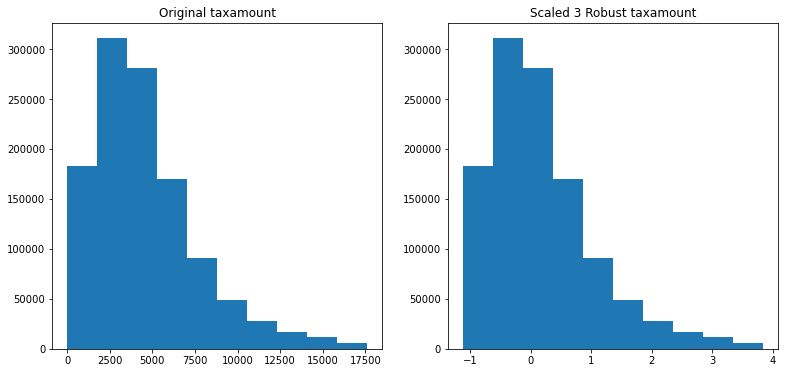

In [52]:
for i in columns_to_scale:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=train, x= i,bins=10)
    plt.title(f'Original {i}')
    plt.subplot(122)
    plt.hist(data=train_scaled3, x= i,bins=10)
    plt.title(f'Scaled 3 Robust {i}');

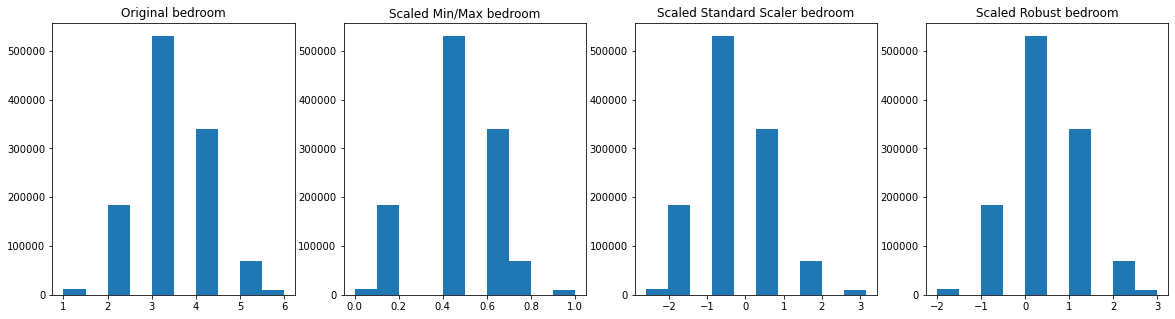

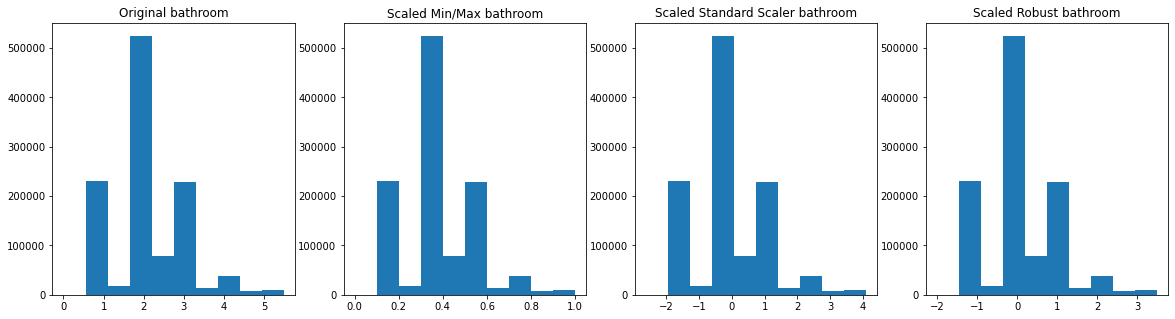

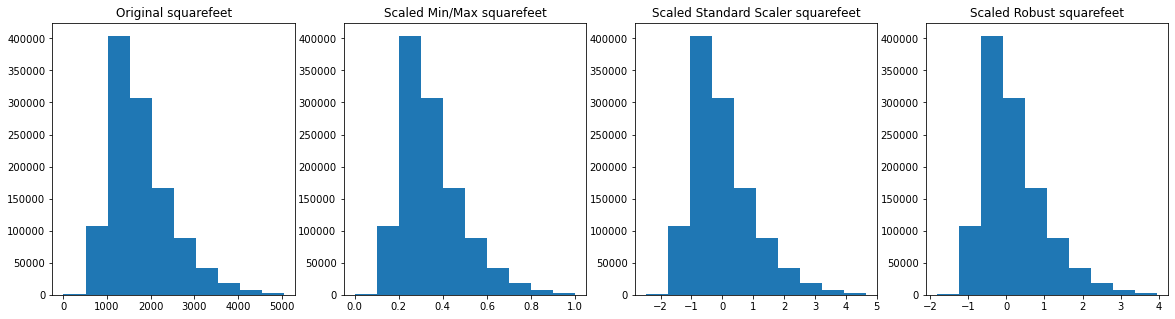

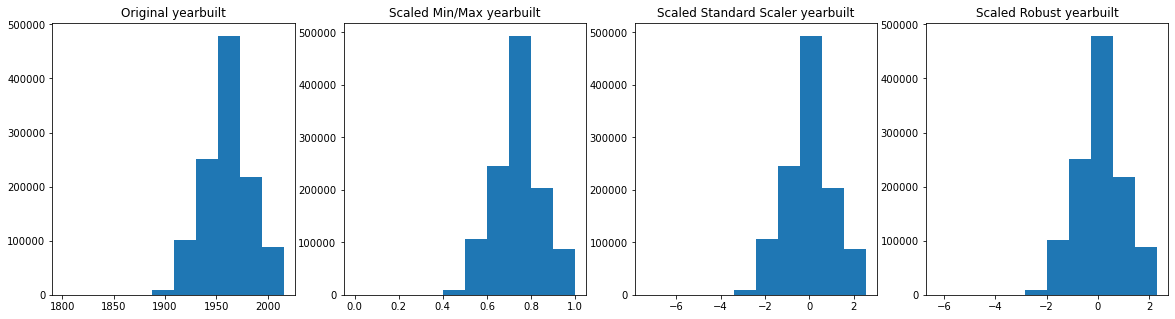

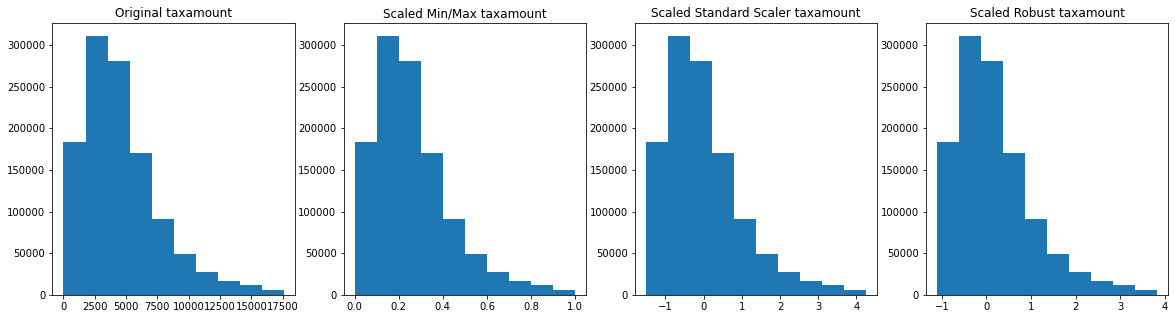

In [54]:
# all vizualizations of scalers together
for i in columns_to_scale:
    plt.figure(figsize=(20, 5))
    plt.subplot(141)
    plt.hist(data=train, x= i,bins=10)
    plt.title(f'Original {i}')
    plt.subplot(142)
    plt.hist(data=train_scaled, x= i,bins=10)
    plt.title(f'Scaled Min/Max {i}')
    plt.subplot(143)
    plt.hist(data=train_scaled2, x= i,bins=10)
    plt.title(f'Scaled Standard Scaler {i}')
    plt.subplot(144)
    plt.hist(data=train_scaled3, x= i,bins=10)
    plt.title(f'Scaled Robust {i}');

In [58]:
def visualize_scaler(scaler , df, columns_to_scale, bins=10):
    '''
    visualize_scaler takes in:
    scaler: method use to scale ex- MinMaxScaler(),StandardScaler(),RobustScaler()
    df: Dataframe 
    columns_to_scale: columns withing the df that will be scaled
    bins: set to default of 10 to display in histographs
    '''
    # set fig size and size of graphing space
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(20,15))
   
    # create copy of dataframe to make scaling obtainable
    df_scaled = df.copy()
    
    # fit and transform scaler 
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    # for loop for columns to scale
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        # Graph Original data
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        # Graph Scaled data
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

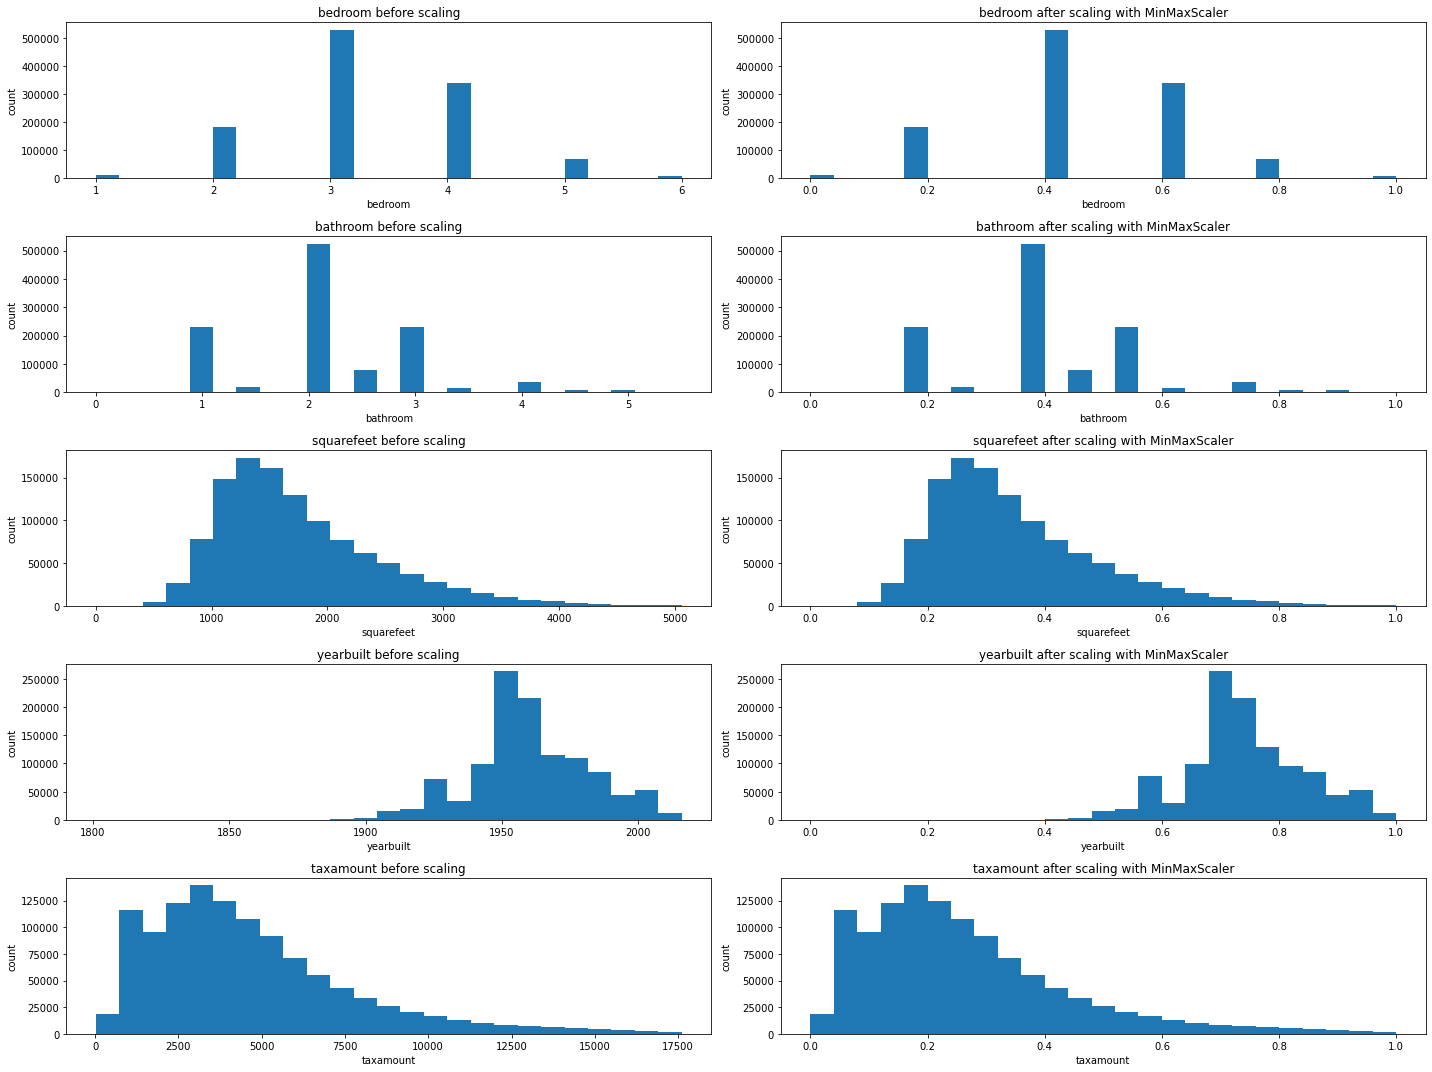

In [57]:
# MinMaxScaler Applied
visualize_scaler(scaler = MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=25)

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [60]:
# select taxamount from train to scale using MinMaxScaler
scaler = MinMaxScaler()
original_data = train[['taxamount']]
scaled_data = scaler.fit_transform(original_data)

In [64]:
# peek at first 10 rows of scaled data
scaled_data[0:10]

array([[0.65531382],
       [0.32760744],
       [0.20368492],
       [0.04907047],
       [0.36958134],
       [0.50157613],
       [0.58264572],
       [0.09984898],
       [0.86187808],
       [0.30800814]])

In [65]:
# the original data, first 10 rows
original_data[0:10]

,taxamount
1754169,11545.48
1221606,5781.99
1264841,3602.52
4661,883.26
1080763,6520.20
54551,8841.64
1237181,10267.44
2005493,1776.32
710756,15178.40
852624,5437.29


In [67]:
# apply inverse_transform to scaled data
scaler.inverse_transform(scaled_data)[:10]

array([[11545.48],
       [ 5781.99],
       [ 3602.52],
       [  883.26],
       [ 6520.2 ],
       [ 8841.64],
       [10267.44],
       [ 1776.32],
       [15178.4 ],
       [ 5437.29]])

Data was transform back into its original numeric form.

In [76]:
# apply inverse transform to train_scaled2 data
# save back into dataframe[and columns] to convert as pd.DataFrame
train_scaled2[columns_to_scale] = scaler2.inverse_transform(train_scaled2[columns_to_scale])

In [77]:
train_scaled2

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1754169,4.0,3.5,4044.0,1139088.0,1989.0,11545.48,6059.0
1221606,4.0,2.0,2378.0,418000.0,1948.0,5781.99,6037.0
1264841,3.0,2.0,1242.0,282308.0,1954.0,3602.52,6037.0
4661,3.0,1.0,1569.0,62828.0,1923.0,883.26,6037.0
1080763,3.0,1.0,1006.0,536000.0,1913.0,6520.20,6037.0
...,...,...,...,...,...,...,...
1523249,2.0,1.0,907.0,30186.0,1952.0,785.93,6037.0
1307933,2.0,1.0,788.0,147113.0,1950.0,2286.01,6037.0
2036816,2.0,1.0,828.0,142600.0,1958.0,1768.17,6037.0
287874,3.0,2.0,2147.0,954544.0,1932.0,11150.50,6059.0


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

**From sklearn.preprocessing.QuantileTransformer documentation:**

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [ ]:
 QuantileTransformer?

In [78]:
qt = QuantileTransformer(output_distribution='normal')


In [79]:
train_scaler4=train.copy()

In [80]:
train_scaler4[columns_to_scale]= qt.fit_transform(train[columns_to_scale])

In [86]:
train

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1754169,4.0,3.5,4044.0,1139088.0,1989.0,11545.48,6059.0
1221606,4.0,2.0,2378.0,418000.0,1948.0,5781.99,6037.0
1264841,3.0,2.0,1242.0,282308.0,1954.0,3602.52,6037.0
4661,3.0,1.0,1569.0,62828.0,1923.0,883.26,6037.0
1080763,3.0,1.0,1006.0,536000.0,1913.0,6520.20,6037.0
...,...,...,...,...,...,...,...
1523249,2.0,1.0,907.0,30186.0,1952.0,785.93,6037.0
1307933,2.0,1.0,788.0,147113.0,1950.0,2286.01,6037.0
2036816,2.0,1.0,828.0,142600.0,1958.0,1768.17,6037.0
287874,3.0,2.0,2147.0,954544.0,1932.0,11150.50,6059.0


In [81]:
train_scaler4

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1754169,0.783330,1.620592,2.363381,1139088.0,1.215372,1.758631,6059.0
1221606,0.783330,-0.144780,0.941700,418000.0,-0.756333,0.602477,6037.0
1264841,-0.244548,-0.144780,-0.686350,282308.0,-0.290058,-0.147307,6037.0
4661,-0.244548,-1.283836,-0.045180,62828.0,-1.684464,-1.829650,6037.0
1080763,-0.244548,-1.283836,-1.327982,536000.0,-2.107953,0.798898,6037.0
...,...,...,...,...,...,...,...
1523249,-1.331018,-1.283836,-1.590991,30186.0,-0.448692,-2.022355,6037.0
1307933,-1.331018,-1.283836,-1.998039,147113.0,-0.604448,-0.763795,6037.0
2036816,-1.331018,-1.283836,-1.843437,142600.0,0.003764,-0.996137,6037.0
287874,-0.244548,-0.144780,0.710366,954544.0,-1.252988,1.698150,6059.0


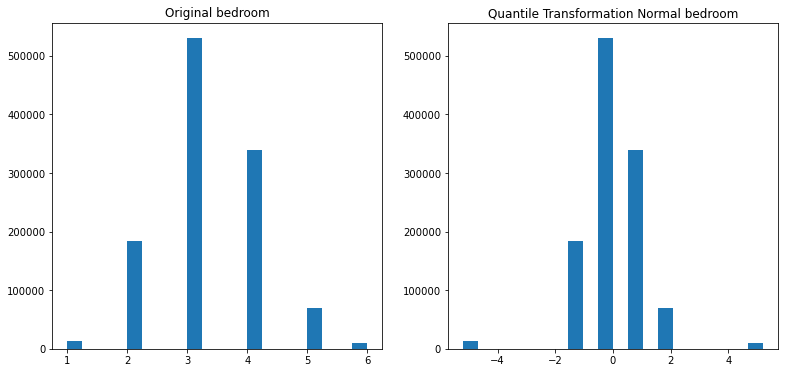

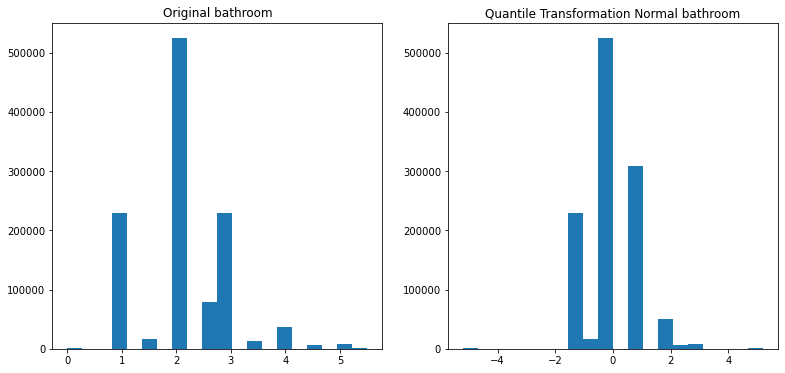

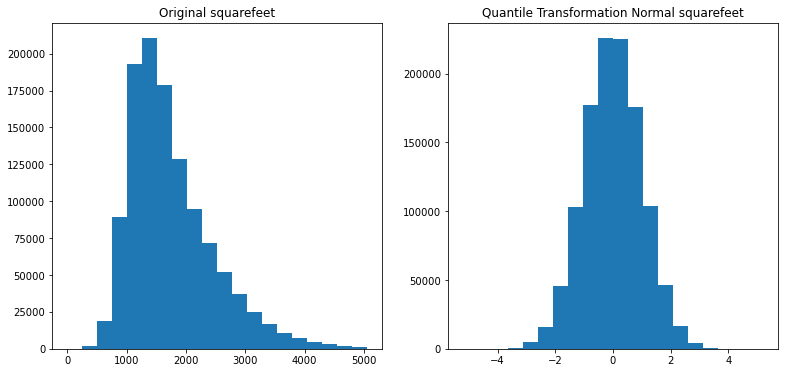

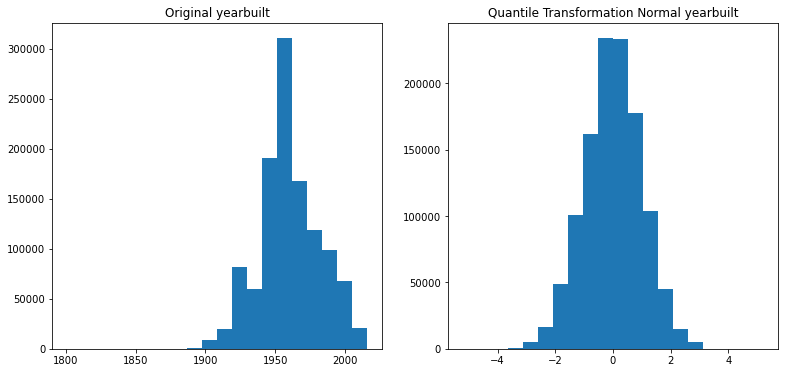

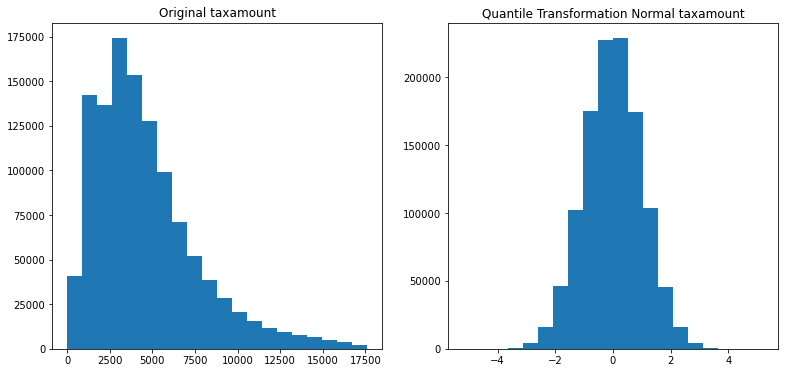

In [83]:
for i in columns_to_scale:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=train, x= i,bins=20)
    plt.title(f'Original {i}')
    
    plt.subplot(122)
    plt.hist(x= i, data=train_scaler4,bins=20)
    plt.title(f'Quantile Transformation Normal {i}')

    plt.show();

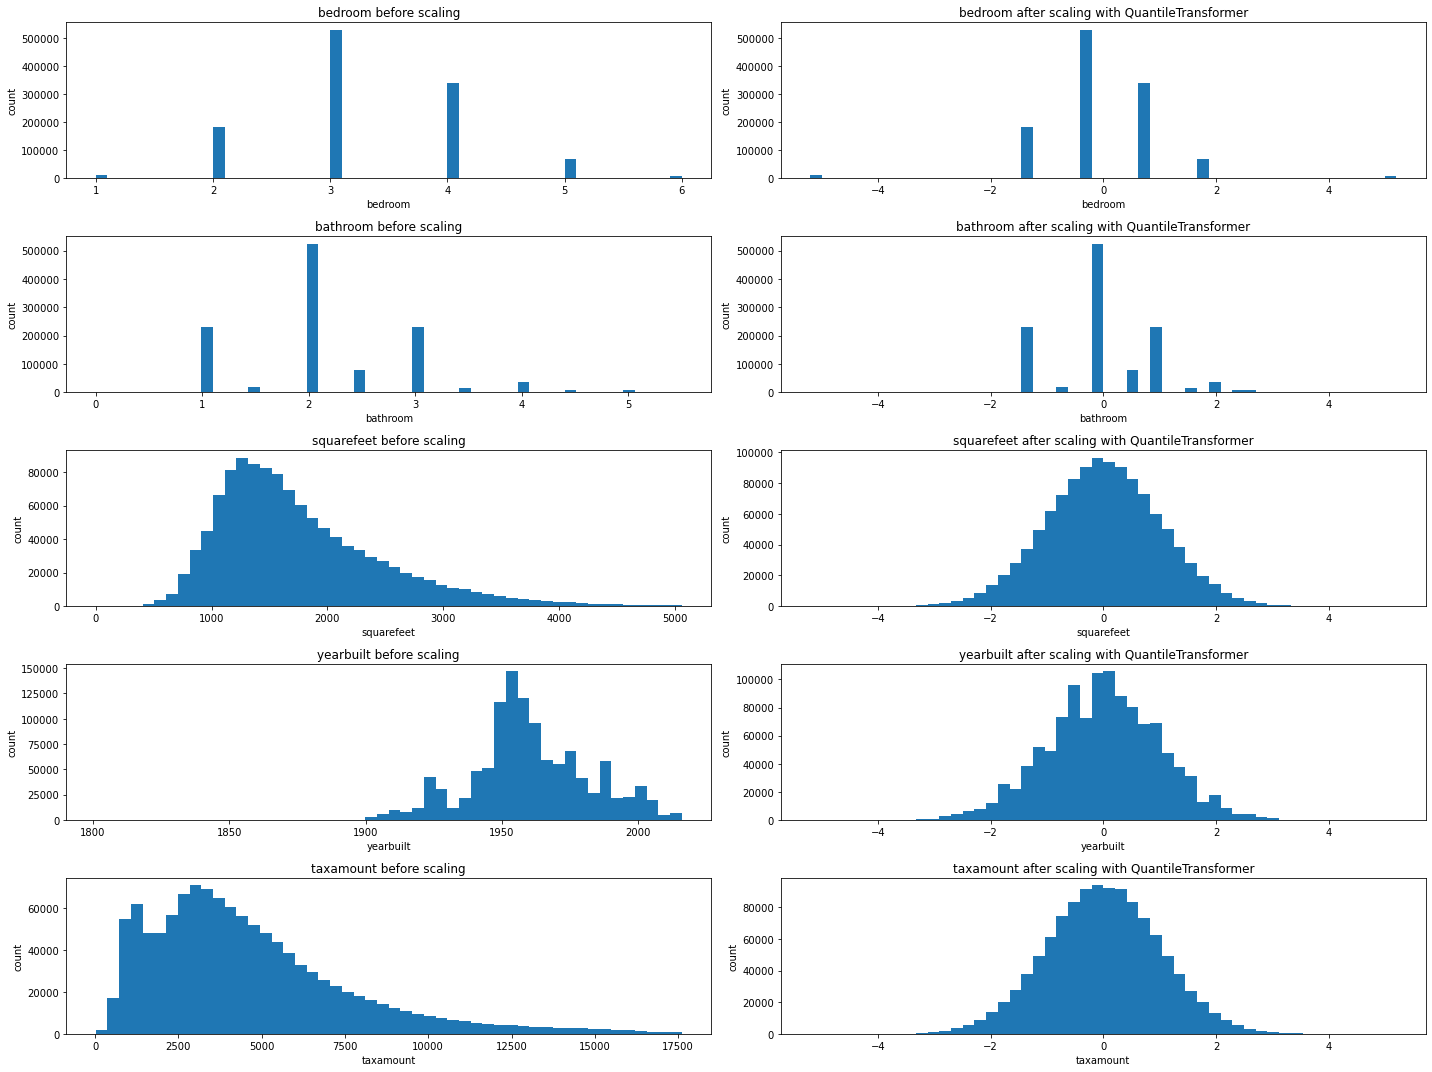

In [84]:
# use QuantileTransformer Normal
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [88]:
qt2 = QuantileTransformer()
train_scaler5=train.copy()
train_scaler5[columns_to_scale]= qt2.fit_transform(train[columns_to_scale])
train_scaler5

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1754169,0.783283,0.947447,0.990669,1139088.0,0.888388,0.961395,6059.0
1221606,0.783283,0.442943,0.825492,418000.0,0.223223,0.728347,6037.0
1264841,0.404404,0.442943,0.246246,282308.0,0.386386,0.442190,6037.0
4661,0.404404,0.100601,0.481982,62828.0,0.045546,0.033112,6037.0
1080763,0.404404,0.100601,0.092092,536000.0,0.017518,0.790911,6037.0
...,...,...,...,...,...,...,...
1523249,0.092092,0.100601,0.055389,30186.0,0.327327,0.021608,6037.0
1307933,0.092092,0.100601,0.022222,147113.0,0.272272,0.222554,6037.0
2036816,0.092092,0.100601,0.032232,142600.0,0.502002,0.158939,6037.0
287874,0.404404,0.442943,0.758008,954544.0,0.104104,0.955820,6059.0


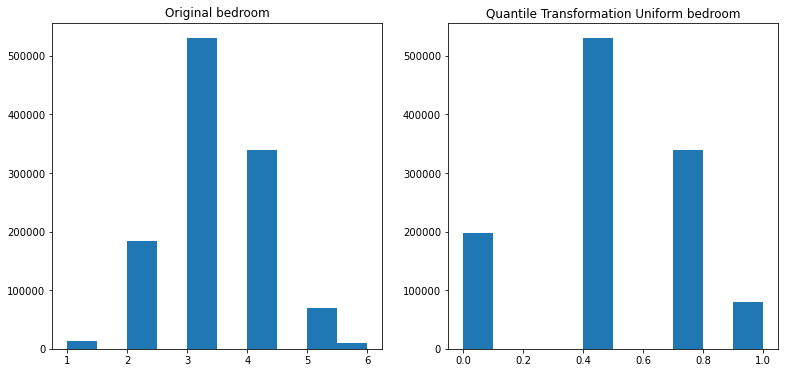

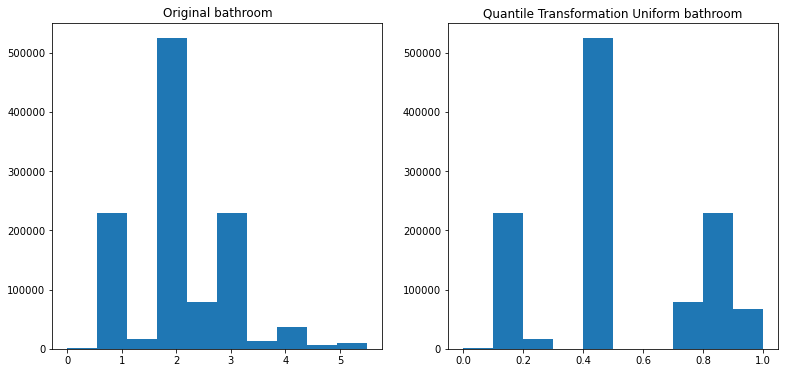

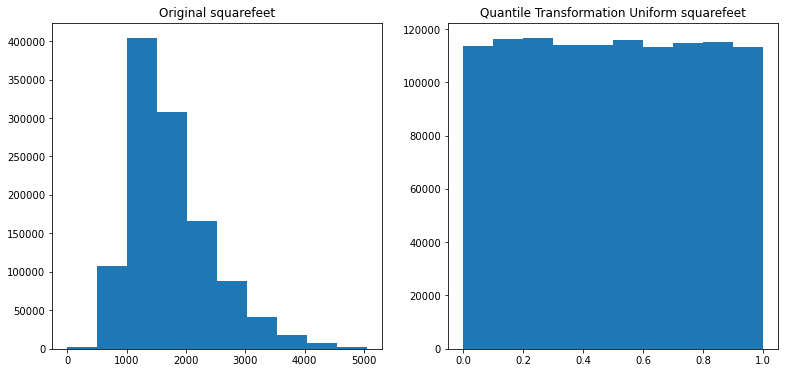

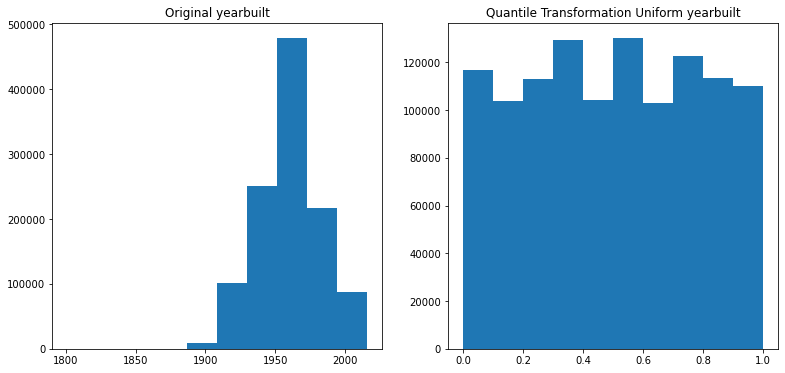

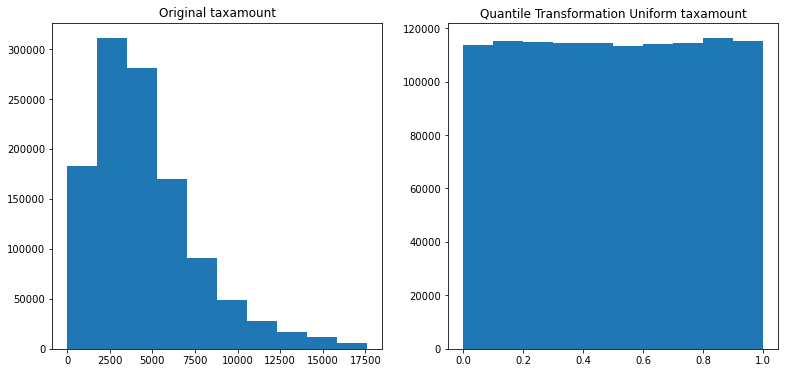

In [90]:
for i in columns_to_scale:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=train, x= i,bins=10)
    plt.title(f'Original {i}')
    
    plt.subplot(122)
    plt.hist(x= i, data=train_scaler5,bins=10)
    plt.title(f'Quantile Transformation Uniform {i}')

    plt.show();

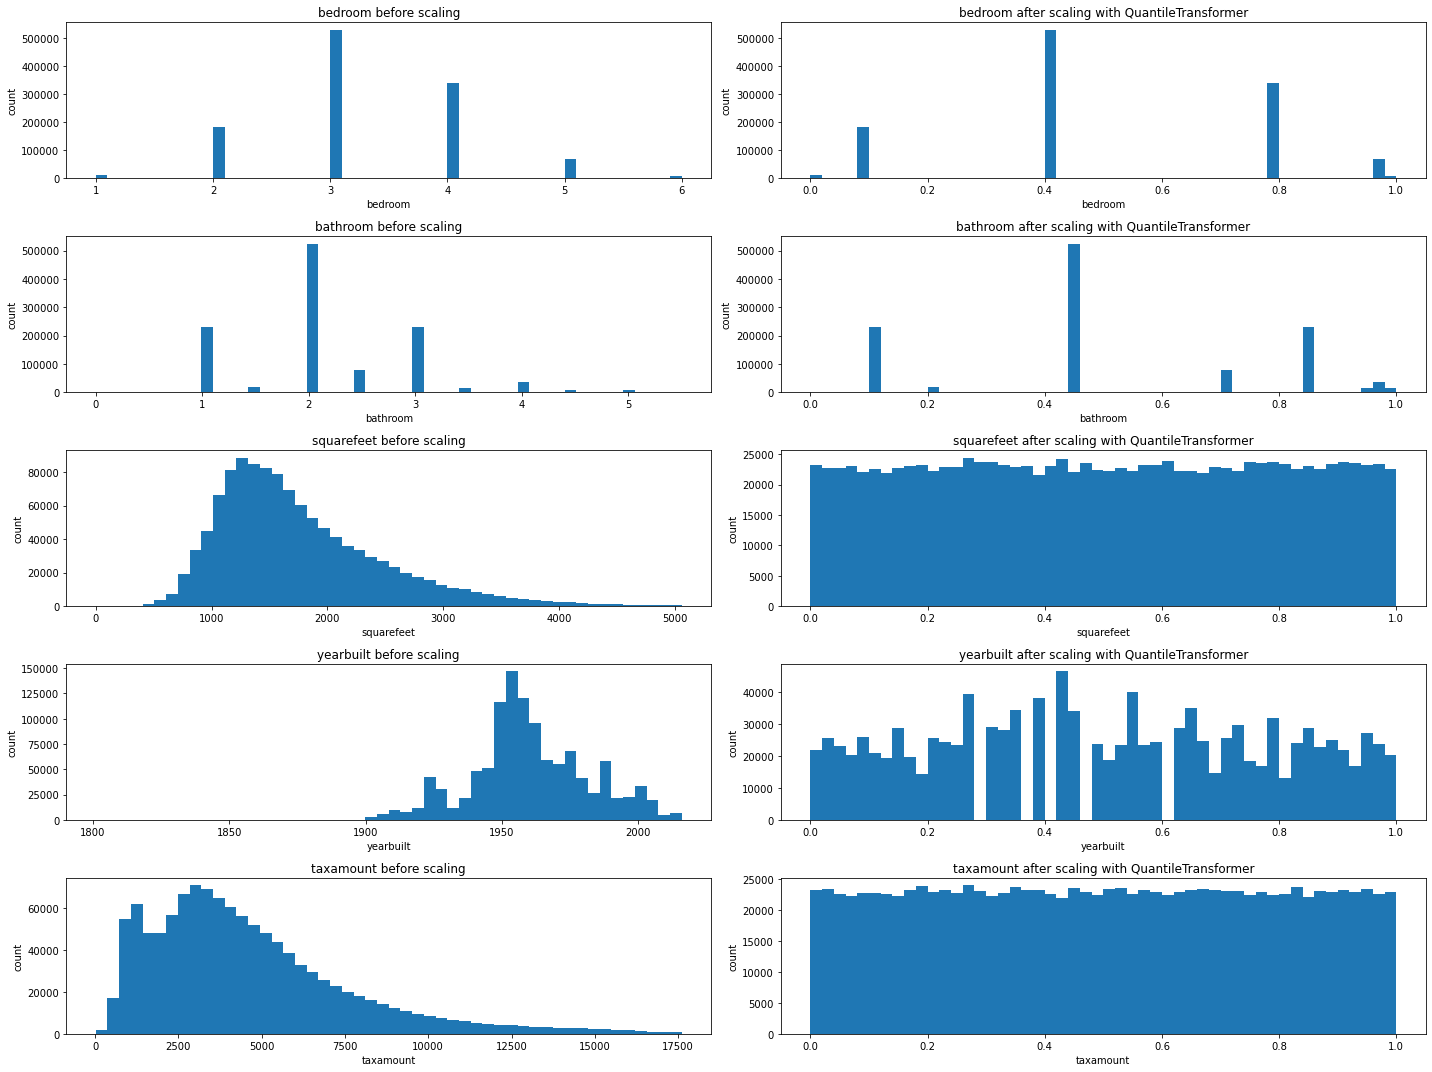

In [91]:
# QuantileTransformer Applied uniform
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [92]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale):
    '''
    scale_data takes in train , validate, test data  and returns their scaled counterparts.
    '''
    # create copies of our original data
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #create the scaler
    scaler = QuantileTransformer(output_distribution='normal')
    # fit the scaler into train data
    scaler.fit(train[columns_to_scale])
    
    # applying the scaler to train, validate, and test data
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    return train_scaled, validate_scaled, test_scaled

In [93]:
train.head()

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1754169,4.0,3.5,4044.0,1139088.0,1989.0,11545.48,6059.0
1221606,4.0,2.0,2378.0,418000.0,1948.0,5781.99,6037.0
1264841,3.0,2.0,1242.0,282308.0,1954.0,3602.52,6037.0
4661,3.0,1.0,1569.0,62828.0,1923.0,883.26,6037.0
1080763,3.0,1.0,1006.0,536000.0,1913.0,6520.20,6037.0


In [97]:
train.columns

Index(['bedroom', 'bathroom', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount', 'fips'],
      dtype='object')

In [99]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test,['bedroom','bathroom','squarefeet','yearbuilt'])
train_scaled

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1754169,0.779924,1.629992,2.336830,1139088.0,1.207532,11545.48,6059.0
1221606,0.779924,-0.142244,0.936241,418000.0,-0.761353,5781.99,6037.0
1264841,-0.245840,-0.142244,-0.686350,282308.0,-0.293986,3602.52,6037.0
4661,-0.245840,-1.278137,-0.043924,62828.0,-1.689670,883.26,6037.0
1080763,-0.245840,-1.278137,-1.338150,536000.0,-2.107953,6520.20,6037.0
...,...,...,...,...,...,...,...
1523249,-1.331018,-1.278137,-1.599950,30186.0,-0.451469,785.93,6037.0
1307933,-1.331018,-1.278137,-1.991313,147113.0,-0.607463,2286.01,6037.0
2036816,-1.331018,-1.278137,-1.841382,142600.0,0.000000,1768.17,6037.0
287874,-0.245840,-0.142244,0.696707,954544.0,-1.261282,11150.50,6059.0


In [100]:
validate_scaled

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1690518,0.779924,0.540882,0.439001,321036.0,0.933910,3756.78,6111.0
751145,0.779924,-0.142244,-0.812654,353179.0,-0.293986,4359.60,6059.0
174124,-1.331018,-1.278137,-0.263985,71427.0,-1.918441,1082.13,6037.0
1128232,0.779924,-0.142244,0.355713,762452.0,0.239380,8542.76,6059.0
1164738,-0.245840,-0.142244,0.188033,446553.0,0.000000,5536.15,6037.0
...,...,...,...,...,...,...,...
471490,0.779924,0.540882,1.261282,492931.0,0.426601,5855.48,6059.0
553654,-0.245840,-1.278137,-1.068522,209844.0,-1.513589,2778.46,6037.0
265169,-0.245840,-1.278137,-1.014571,342660.0,-0.293986,4096.42,6037.0
1816794,0.779924,-0.142244,0.386176,285878.0,-0.199538,3620.28,6059.0


In [101]:
test_scaled

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1240539,-1.331018,-0.142244,-1.654145,59416.0,1.109378,1070.61,6037.0
776071,-1.331018,-1.278137,-1.554270,234051.0,-0.607463,2975.10,6037.0
763594,1.761948,0.999986,1.426744,885787.0,1.431971,8495.96,6059.0
136239,-0.245840,-0.142244,-0.448692,56696.0,-0.199538,1013.76,6037.0
1959995,-0.245840,0.540882,0.465405,679060.0,1.061884,8557.94,6111.0
...,...,...,...,...,...,...,...
2079557,0.779924,-0.142244,0.321611,541600.0,0.457033,7224.71,6037.0
1110744,-5.199338,-1.278137,-1.102440,445000.0,-0.451469,5509.38,6037.0
78414,0.779924,-0.142244,0.817025,554875.0,-0.377630,7015.84,6037.0
1842310,0.779924,0.999986,1.321946,415128.0,-1.164444,5093.10,6037.0


In [102]:
scaler

MinMaxScaler()